## UCI dataset KNN (n=3), simple/cv/gridsearch

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell  #to run all statements in cell, not only the last
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [10]:
data = pd.read_csv('heart.csv', sep=",")
data.head(5)
data.dtypes

#features from the 1 lab: cp, thalach, exang, oldpeak, ca

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
features = data.drop(['target'], axis=1)
target_tmp = data['target']

target = pd.DataFrame({'target':target_tmp.index, 'target':target_tmp.values})

features.head(5)
type(features)
features.shape
target.head(5)
type(target)
target.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


pandas.core.frame.DataFrame

(303, 13)

,target
0,1
1,1
2,1
3,1
4,1


pandas.core.frame.DataFrame

(303, 1)

In [12]:
UCI_X_train, UCI_X_test, UCI_y_train, UCI_y_test = train_test_split(features, target, test_size=0.33, random_state=1)
UCI_X_train.shape
UCI_X_test.shape
UCI_y_train.shape
UCI_y_test.shape

(203, 13)

(100, 13)

(203, 1)

(100, 1)

In [13]:
np.unique(UCI_y_train)
np.unique(UCI_y_test)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [14]:
#3 neighbors
#test
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj.fit(UCI_X_train, UCI_y_train)
target_pred_n3 = KNeighborsClassifierObj.predict(UCI_X_test)
target_pred_n3

#train
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj.fit(UCI_X_train, UCI_y_train)
target_n3 = KNeighborsClassifierObj.predict(UCI_X_train)
target_n3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1], dtype=int64)

#### Model quality

In [15]:
confusion_matrix(UCI_y_test, target_pred_n3, labels=[0, 1])

array([[25, 21],
       [15, 39]], dtype=int64)

In [16]:
# accuracy_score(UCI_y_train, target_n3)

In [17]:
accuracy_score(UCI_y_test, target_pred_n3)
precision_score(UCI_y_test, target_pred_n3), recall_score(UCI_y_test, target_pred_n3)
f1_score(UCI_y_test, target_pred_n3)

0.64

(0.65, 0.7222222222222222)

0.6842105263157895

In [18]:
print(classification_report(UCI_y_test, target_pred_n3, target_names=UCI_y_test.drop_duplicates()))

              precision    recall  f1-score   support

      target       0.62      0.54      0.58        46

   micro avg       0.64      0.64      0.64       100
   macro avg       0.64      0.63      0.63       100
weighted avg       0.64      0.64      0.64       100



## Cross-validation

In [19]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         features, target, 
                         cv=KFold(n_splits=5))
scores

array([0.52459016, 0.55737705, 0.6557377 , 0.38333333, 0.36666667])

In [20]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        features, target, scoring=scoring, 
                        cv=KFold(n_splits=5), return_train_score=True)
scores

{'fit_time': array([0.00799775, 0.00999546, 0.00399709, 0.00399876, 0.00299859]),
 'score_time': array([0.01399207, 0.01398993, 0.00799584, 0.00799537, 0.00799561]),
 'test_f1': array([0.68817204, 0.71578947, 0.66850693, 0.55421687, 0.53658537]),
 'test_precision': array([1.       , 1.       , 0.6976867, 1.       , 1.       ]),
 'test_recall': array([0.52459016, 0.55737705, 0.6557377 , 0.38333333, 0.36666667]),
 'train_f1': array([0.76797926, 0.79251794, 0.7933602 , 0.80613313, 0.83142011]),
 'train_precision': array([0.76778955, 0.7926435 , 0.79344039, 0.80607075, 0.83216978]),
 'train_recall': array([0.76859504, 0.79338843, 0.79338843, 0.81069959, 0.83539095])}

In [21]:
# 3.Оценка качества модели с использованием кросс-валидации
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         features, target, 
                         cv=LeaveOneOut())
np.mean(scores)

0.6270627062706271

## Grid parameter search

#### Test train split

In [22]:
n_range = np.array(range(1,26,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25])}]

In [23]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(UCI_X_train, UCI_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00718884, 0.00499759, 0.00379381, 0.00359778, 0.00420556,
        0.00459733, 0.00499701, 0.00359774, 0.00439734, 0.00359817,
        0.00380211, 0.00339823, 0.00379739, 0.00339837, 0.00360141,
        0.00339813, 0.0037951 , 0.00539703, 0.00379419, 0.00359802,
        0.00359802, 0.00319839, 0.00339847, 0.00359793, 0.00339999]),
 'mean_score_time': array([0.00299869, 0.0023982 , 0.00159912, 0.00199933, 0.00219059,
        0.00260305, 0.00220046, 0.00199957, 0.00279512, 0.00219793,
        0.00199838, 0.00199866, 0.00199933, 0.001999  , 0.00179925,
        0.00199914, 0.00259852, 0.00240192, 0.00199928, 0.00179882,
        0.00199871, 0.00199847, 0.00199828, 0.00179873, 0.00199709]),
 'mean_test_score': array([0.64039409, 0.61083744, 0.67980296, 0.63546798, 0.65517241,
        0.66009852, 0.66502463, 0.68472906, 0.67487685, 0.66995074,
        0.65024631, 0.66502463, 0.65024631, 0.65517241, 0.6453202 ,
        0.63546798, 0.65517241, 0.60591133, 0.62561576, 0

In [25]:
clf_gs.best_estimator_
clf_gs.best_score_
clf_gs.best_params_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

0.6847290640394089

{'n_neighbors': 8}

#### CV split

In [26]:
clf_gs2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs2.fit(features, target)

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
clf_gs2.best_estimator_
clf_gs2.best_score_
clf_gs2.best_params_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=24, p=2,
           weights='uniform')

0.66996699669967

{'n_neighbors': 24}

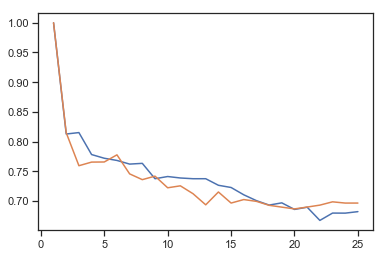

In [28]:
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])
plt.plot(n_range, clf_gs2.cv_results_['mean_train_score'])

#### Retrain model

In [29]:
clf_gs.best_estimator_.fit(UCI_X_train, UCI_y_train)
target2_0 = clf_gs.best_estimator_.predict(UCI_X_train)
target2_1 = clf_gs.best_estimator_.predict(UCI_X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [30]:
accuracy_score(UCI_y_train, target2_0), accuracy_score(UCI_y_test, target2_1)

(0.7783251231527094, 0.6)

In [31]:
clf_gs2.best_estimator_.fit(UCI_X_train, UCI_y_train)
target3_0 = clf_gs2.best_estimator_.predict(UCI_X_train)
target3_1 = clf_gs2.best_estimator_.predict(UCI_X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=24, p=2,
           weights='uniform')

In [32]:
# Лучший результат на cv=LeaveOneOut() валидации а не разбиения самостоятельно
accuracy_score(UCI_y_train, target3_0), accuracy_score(UCI_y_test, target3_1)

(0.6847290640394089, 0.66)

### Plots

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [34]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

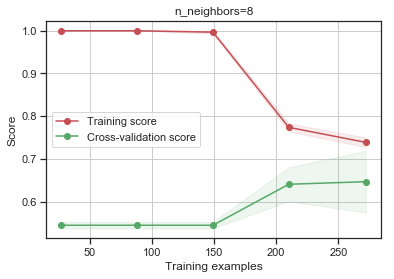

In [35]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=8), 'n_neighbors=8', 
                    features, target, cv=10)

<module 'matplotlib.pyplot' from 'D:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

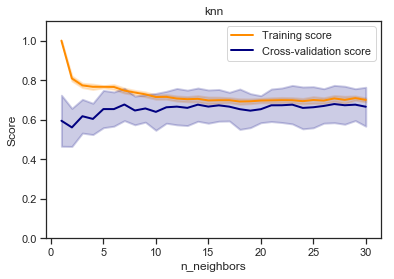

In [36]:
n_range2 = np.array(range(1,31,1))
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      features, target, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=10, scoring="accuracy")

### Test model om me

In [37]:
data = pd.read_csv('my_heart.csv', sep=",")
data.head(5)
data.dtypes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,22,1,0,125,233,0,0,160,0,3,0,2,2


age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
dtype: object

In [38]:
clf_gs.best_estimator_.predict(data)
clf_gs2.best_estimator_.predict(data)

array([1], dtype=int64)

array([1], dtype=int64)